In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dir = 'round_3_2025/'

def simple_mid_price(row):
    bid = row[3]
    ask = row[9]
    return (bid+ask) / 2

prices_1_0 = pd.read_csv(dir+"prices_round_3_day_0.csv", delimiter=';')
prices_1_1 = pd.read_csv(dir+"prices_round_3_day_1.csv", delimiter=';')
prices_1_1['timestamp'] += 1000000 # shift day 2 to 0-24h
prices_1_2 = pd.read_csv(dir+"prices_round_3_day_2.csv", delimiter=';')
prices_1_2['timestamp'] += 2000000 # shift day 2 to 0-24h

prices = pd.concat([prices_1_0, prices_1_1, prices_1_2])
prices['mid_price'] = prices.apply(simple_mid_price, axis=1)

prices = pd.concat([prices_1_0, prices_1_1, prices_1_2])

C:\Users\chris\AppData\Local\Temp\ipykernel_28312\3331338665.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bid = row[3]
C:\Users\chris\AppData\Local\Temp\ipykernel_28312\3331338665.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ask = row[9]


In [3]:
prices['product'].unique()

array(['VOLCANIC_ROCK_VOUCHER_10500', 'DJEMBES', 'CROISSANTS', 'JAMS',
       'VOLCANIC_ROCK_VOUCHER_10000', 'KELP',
       'VOLCANIC_ROCK_VOUCHER_9750', 'PICNIC_BASKET1', 'PICNIC_BASKET2',
       'VOLCANIC_ROCK_VOUCHER_9500', 'RAINFOREST_RESIN',
       'VOLCANIC_ROCK_VOUCHER_10250', 'SQUID_INK', 'VOLCANIC_ROCK'],
      dtype=object)

In [5]:
# 1e6 timestamps/day
# 365 days/year
# 1e6*365 = 365e6 timestamps/year

In [179]:
voucher_df['time_to_expiry']

0         0.021918
1         0.021918
2         0.021918
3         0.021918
4         0.021918
            ...   
149995    0.013699
149996    0.013699
149997    0.013699
149998    0.013699
149999    0.013699
Name: time_to_expiry, Length: 150000, dtype: float64

In [186]:
(8e6 - voucher_df['timestamp'])

0         8000000.0
1         8000000.0
2         8000000.0
3         8000000.0
4         8000000.0
            ...    
149995    5000100.0
149996    5000100.0
149997    5000100.0
149998    5000100.0
149999    5000100.0
Name: timestamp, Length: 150000, dtype: float64

In [6]:
vouchers = ['VOLCANIC_ROCK_VOUCHER_10500', 'VOLCANIC_ROCK_VOUCHER_10000', 
            'VOLCANIC_ROCK_VOUCHER_9750', 'VOLCANIC_ROCK_VOUCHER_9500',
            'VOLCANIC_ROCK_VOUCHER_10250']


voucher_df = prices[prices['product'].isin(vouchers)]
voucher_df.reset_index(drop=True, inplace=True)

# each round has 1 mil stamps
start_time = 1000000 * 8 # starting at day 0, expires on day 8

voucher_df['strike_price'] = voucher_df['product'].apply(lambda x: int(x.split('_')[-1]))
voucher_df['strike_price'] = voucher_df['strike_price'].astype(int)
voucher_df['time_to_expiry'] = (start_time - voucher_df['timestamp']) / 365e6 # convert to years

spot_price = prices[prices['product'] == 'VOLCANIC_ROCK'][['mid_price', 'timestamp']]
spot_price.rename(columns={'mid_price': 'underlying_price'}, inplace=True)


voucher_df = pd.merge(voucher_df, spot_price, on='timestamp', how='left')

voucher_df = voucher_df[['timestamp', 'product', 'mid_price', 'strike_price', 'time_to_expiry', 'underlying_price']]
voucher_df.head(20)

C:\Users\chris\AppData\Local\Temp\ipykernel_10388\1618201230.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voucher_df['strike_price'] = voucher_df['product'].apply(lambda x: int(x.split('_')[-1]))
C:\Users\chris\AppData\Local\Temp\ipykernel_10388\1618201230.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voucher_df['strike_price'] = voucher_df['strike_price'].astype(int)
C:\Users\chris\AppData\Local\Temp\ipykernel_10388\1618201230.py:14: SettingWithCopyWarning: 
A value is trying to be set on a 

,timestamp,product,mid_price,strike_price,time_to_expiry,underlying_price
0,0,VOLCANIC_ROCK_VOUCHER_10500,99.5,10500,0.021918,10503.0
1,0,VOLCANIC_ROCK_VOUCHER_10000,505.5,10000,0.021918,10503.0
2,0,VOLCANIC_ROCK_VOUCHER_9750,754.5,9750,0.021918,10503.0
3,0,VOLCANIC_ROCK_VOUCHER_9500,1003.5,9500,0.021918,10503.0
4,0,VOLCANIC_ROCK_VOUCHER_10250,273.5,10250,0.021918,10503.0
5,100,VOLCANIC_ROCK_VOUCHER_10000,515.5,10000,0.021918,10510.0
6,100,VOLCANIC_ROCK_VOUCHER_10250,279.5,10250,0.021918,10510.0
7,100,VOLCANIC_ROCK_VOUCHER_10500,102.5,10500,0.021918,10510.0
8,100,VOLCANIC_ROCK_VOUCHER_9750,761.5,9750,0.021918,10510.0
9,100,VOLCANIC_ROCK_VOUCHER_9500,1010.5,9500,0.021918,10510.0


# implied vol 

In [7]:
voucher_df['product'].unique()

array(['VOLCANIC_ROCK_VOUCHER_10500', 'VOLCANIC_ROCK_VOUCHER_10000',
       'VOLCANIC_ROCK_VOUCHER_9750', 'VOLCANIC_ROCK_VOUCHER_9500',
       'VOLCANIC_ROCK_VOUCHER_10250'], dtype=object)

In [ ]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import brentq

def black_scholes_call(spot, strike, time_to_expiry, volatility, r=0.0):
    d1 = (np.log(spot / strike) + (r + 0.5 * volatility ** 2) * time_to_expiry) / (volatility * np.sqrt(time_to_expiry))
    d2 = d1 - volatility * np.sqrt(time_to_expiry)
    call_price = (spot * norm.cdf(d1) - strike * np.exp(-r * time_to_expiry) * norm.cdf(d2))
    return call_price

def black_scholes_put(spot, strike, time_to_expiry, volatility, r=0.0):
    d1 = (np.log(spot / strike) + (r + 0.5 * volatility ** 2) * time_to_expiry) / (volatility * np.sqrt(time_to_expiry))
    d2 = d1 - volatility * np.sqrt(time_to_expiry)
    put_price = (strike * np.exp(-r * time_to_expiry) * norm.cdf(-d2) - spot * norm.cdf(-d1))
    return put_price

def delta(spot, strike, time_to_expiry, volatility):
    d1 = (np.log(spot) - np.log(strike) + (0.5 * volatility ** 2) * time_to_expiry) / (volatility * np.sqrt(time_to_expiry))
    return norm.cdf(d1)

def gamma(spot, strike, time_to_expiry, volatility):
    d1 = (np.log(spot) - np.log(strike) + (0.5 * volatility ** 2) * time_to_expiry) / (volatility * np.sqrt(time_to_expiry))
    return norm.pdf(d1)/(spot * volatility * np.sqrt(time_to_expiry))

def vega(spot, strike, time_to_expiry, volatility):
    d1 = (np.log(spot) - np.log(strike) + (0.5 * volatility ** 2) * time_to_expiry) / (volatility * np.sqrt(time_to_expiry))
    return norm.pdf(d1) * (spot * np.sqrt(time_to_expiry)) / 100

def theta(spot, strike, time_to_expiry, volatility, r=0.0):
    d1 = (np.log(spot) - np.log(strike) + (0.5 * volatility ** 2) * time_to_expiry) / (volatility * np.sqrt(time_to_expiry))
    d2 = d1 - volatility * np.sqrt(time_to_expiry)
    term1 = -(spot * norm.pdf(d1) * volatility) / (2 * np.sqrt(time_to_expiry))
    term2 = r * strike * np.exp(-r * time_to_expiry) * norm.cdf(d2)
    return term1 - term2

def implied_volatility(row, product, call_price, spot, strike, time_to_expiry, r=0.00):
    # Define the equation where the root is the implied volatility
    def equation(volatility):
        estimated_price = black_scholes_call(spot, strike, time_to_expiry, volatility, r)
        return estimated_price - call_price

    try:
        # Using Brent's method to find the root of the equation
        implied_vol = brentq(equation, 1e-10, 3.0, xtol=1e-10)
    except:
        print(row, product, 'very far out of the money, returning 0')
        return 0 # has no volatility because so far out of the money
    
    return implied_vol

def realized_vol(df, spot_col='underlying_price', window=1000):
    returns = np.log(df[spot_col] / df[spot_col].shift(1))
    rolling_std = returns.rolling(window=window).std() 
    timesteps_per_year = 365e6
    annualization_factor = np.sqrt(timesteps_per_year / window)
    df['realized_vol'] = rolling_std * annualization_factor
    return df


In [ ]:
voucher_df['implied_vol'] = voucher_df.apply(lambda row: implied_volatility(row['timestamp'], row['product'], row['mid_price'], row['underlying_price'], row['strike_price'], row['time_to_expiry']), axis=1)
# save this so i don't have to recalculate it
voucher_df.to_csv("voucher_df_with_implied_vol.csv", index=False)

4200 VOLCANIC_ROCK_VOUCHER_9500 very far out of the money, returning 0
12200 VOLCANIC_ROCK_VOUCHER_9500 very far out of the money, returning 0
15800 VOLCANIC_ROCK_VOUCHER_9500 very far out of the money, returning 0
41400 VOLCANIC_ROCK_VOUCHER_9500 very far out of the money, returning 0
42000 VOLCANIC_ROCK_VOUCHER_9500 very far out of the money, returning 0
72700 VOLCANIC_ROCK_VOUCHER_9500 very far out of the money, returning 0
79400 VOLCANIC_ROCK_VOUCHER_9500 very far out of the money, returning 0
80500 VOLCANIC_ROCK_VOUCHER_9500 very far out of the money, returning 0
83100 VOLCANIC_ROCK_VOUCHER_9500 very far out of the money, returning 0
90800 VOLCANIC_ROCK_VOUCHER_9500 very far out of the money, returning 0
92400 VOLCANIC_ROCK_VOUCHER_9500 very far out of the money, returning 0
109100 VOLCANIC_ROCK_VOUCHER_9500 very far out of the money, returning 0
121100 VOLCANIC_ROCK_VOUCHER_9500 very far out of the money, returning 0
131300 VOLCANIC_ROCK_VOUCHER_9500 very far out of the money, re

In [ ]:
# load from csv
voucher_df = pd.read_csv("voucher_df_with_implied_vol.csv")

# calculate vega
voucher_df['vega'] = voucher_df.apply(lambda row: vega(row['underlying_price'], row['strike_price'], row['time_to_expiry'], row['implied_vol']), axis=1)
# calculate delta
voucher_df['delta'] = voucher_df.apply(lambda row: delta(row['underlying_price'], row['strike_price'], row['time_to_expiry'], row['implied_vol']), axis=1)
# calculate gamma
voucher_df['gamma'] = voucher_df.apply(lambda row: gamma(row['underlying_price'], row['strike_price'], row['time_to_expiry'], row['implied_vol']), axis=1)

voucher_df['realized_vol'] = voucher_df.apply(lambda row: realized_vol(prices[prices['timestamp'] <= row['timestamp']], spot_col='mid_price', window=500)['realized_vol'].iloc[-1], axis=1)

C:\Users\chris\AppData\Local\Temp\ipykernel_28312\2404763088.py:26: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(spot) - np.log(strike) + (0.5 * volatility ** 2) * time_to_expiry) / (volatility * np.sqrt(time_to_expiry))
C:\Users\chris\AppData\Local\Temp\ipykernel_28312\2404763088.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(spot) - np.log(strike) + (0.5 * volatility ** 2) * time_to_expiry) / (volatility * np.sqrt(time_to_expiry))
C:\Users\chris\AppData\Local\Temp\ipykernel_28312\2404763088.py:22: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(spot) - np.log(strike) + (0.5 * volatility ** 2) * time_to_expiry) / (volatility * np.sqrt(time_to_expiry))
C:\Users\chris\AppData\Local\Temp\ipykernel_28312\2404763088.py:23: RuntimeWarning: invalid value encountered in scalar divide
  return norm.pdf(d1)/(spot * volatility * np.sqrt(time_to_expiry))


In [210]:
# load csv
vouchers_df = pd.read_csv("voucher_df_with_implied_vol.csv")

In [154]:
def fix_data(data):
    new_data = []
    prev_non_zero = None
    
    for j in range(1, len(data)):
        if data[j] < 2e-10:
            new_data.append(prev_non_zero)
        else:
            prev_non_zero = data[j]
            new_data.append(data[j])

    new_data = np.array(new_data)
    return new_data

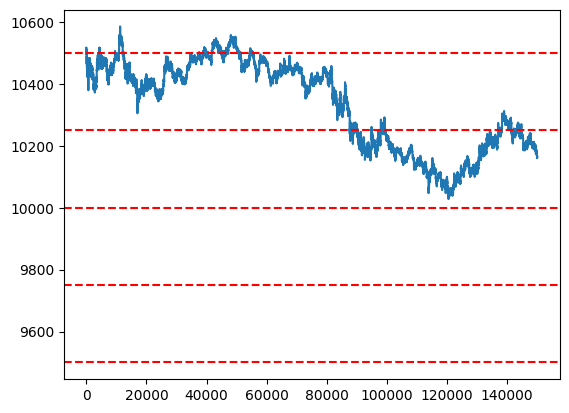

In [ ]:
vouchers = ['VOLCANIC_ROCK_VOUCHER_10500',
            'VOLCANIC_ROCK_VOUCHER_10250',
            'VOLCANIC_ROCK_VOUCHER_10000',
            'VOLCANIC_ROCK_VOUCHER_9750',
            'VOLCANIC_ROCK_VOUCHER_9500']

underlying_prices = vouchers_df[vouchers_df['product'] == 'VOLCANIC_ROCK_VOUCHER_10500'][['underlying_price', 'timestamp']]
plt.plot(underlying_prices['underlying_price'])
plt.axhline(10500, color='red', linestyle='--')
plt.axhline(10250, color='red', linestyle='--')
plt.axhline(10000, color='red', linestyle='--')
plt.axhline(9750, color='red', linestyle='--')
plt.axhline(9500, color='red', linestyle='--')

In [516]:
underlying_prices['underlying_price']

returns = np.log(underlying_prices['underlying_price'] / underlying_prices['underlying_price'].shift(1))
rv_std = returns.std()

hard_coded_rv = rv_std * np.sqrt(365 * 10000)
hard_coded_rv 

0.47819602665563404

In [507]:
def realized_vol(df, spot_col='underlying_price', window=1000):
    returns = np.log(df[spot_col] / df[spot_col].shift(1))
    rolling_std = returns.rolling(window=window).std() 
    timesteps_per_year = 3.65e6 / 2
    print(rolling_std.mean())
    annualization_factor = np.sqrt(timesteps_per_year)
    df['realized_vol'] = rolling_std * annualization_factor
    return df

0.0002402409552288798


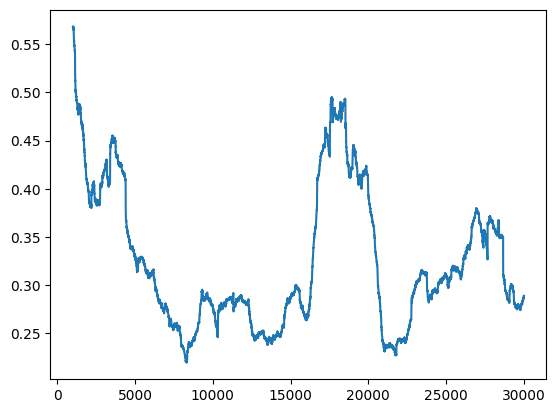

In [508]:
underlying_prices = vouchers_df[vouchers_df['product'] == 'VOLCANIC_ROCK_VOUCHER_10500'][['underlying_price', 'timestamp']]

underlying_prices = realized_vol(underlying_prices, window=1000)

RV = underlying_prices['realized_vol'].values

plt.plot(RV)

In [682]:
from math import log, sqrt, exp
from statistics import NormalDist

class BlackScholes:
    @staticmethod
    def black_scholes_call(spot, strike, time_to_expiry, volatility):
        d1 = (
            log(spot) - log(strike) + (0.5 * volatility * volatility) * time_to_expiry
        ) / (volatility * sqrt(time_to_expiry))
        d2 = d1 - volatility * sqrt(time_to_expiry)
        call_price = spot * NormalDist().cdf(d1) - strike * NormalDist().cdf(d2)
        return call_price

    @staticmethod
    def black_scholes_put(spot, strike, time_to_expiry, volatility):
        d1 = (log(spot / strike) + (0.5 * volatility * volatility) * time_to_expiry) / (
            volatility * sqrt(time_to_expiry)
        )
        d2 = d1 - volatility * sqrt(time_to_expiry)
        put_price = strike * NormalDist().cdf(-d2) - spot * NormalDist().cdf(-d1)
        return put_price

    @staticmethod
    def delta(spot, strike, time_to_expiry, volatility):
        d1 = (
            log(spot) - log(strike) + (0.5 * volatility * volatility) * time_to_expiry
        ) / (volatility * sqrt(time_to_expiry))
        return NormalDist().cdf(d1)

    @staticmethod
    def gamma(spot, strike, time_to_expiry, volatility):
        d1 = (
            log(spot) - log(strike) + (0.5 * volatility * volatility) * time_to_expiry
        ) / (volatility * sqrt(time_to_expiry))
        return NormalDist().pdf(d1) / (spot * volatility * sqrt(time_to_expiry))

    @staticmethod
    def vega(spot, strike, time_to_expiry, volatility):
        d1 = (
            log(spot) - log(strike) + (0.5 * volatility * volatility) * time_to_expiry
        ) / (volatility * sqrt(time_to_expiry))
        # print(f"d1: {d1}")
        # print(f"vol: {volatility}")
        # print(f"spot: {spot}")
        # print(f"strike: {strike}")
        # print(f"time: {time_to_expiry}")
        return NormalDist().pdf(d1) * (spot * sqrt(time_to_expiry)) / 100

    @staticmethod
    def implied_volatility(
        call_price, spot, strike, time_to_expiry, max_iterations=200, tolerance=1e-10
    ):
        low_vol = 0.001
        high_vol = 1.0
        volatility = (low_vol + high_vol) / 2.0  # Initial guess as the midpoint
        for _ in range(max_iterations):
            estimated_price = BlackScholes.black_scholes_call(
                spot, strike, time_to_expiry, volatility
            )
            diff = estimated_price - call_price
            if abs(diff) < tolerance:
                break
            elif diff > 0:
                high_vol = volatility
            else:
                low_vol = volatility
            volatility = (low_vol + high_vol) / 2.0
        return volatility
    
model = BlackScholes()

In [ ]:
voucher = vouchers[0]
voucher_df = vouchers_df[vouchers_df['product'] == voucher]

voucher_df['implied_vol'].values[:100]


# keep first 100 rows of voucher df
voucher_df = voucher_df[:100]
voucher_df['new_iv'] = voucher_df.apply(
    lambda row: model.implied_volatility(
        row['mid_price'],
        row['underlying_price'],
        row['strike_price'],
        row['time_to_expiry'],
    ),
    axis=1,
)

,new_iv,implied_vol
0,0.157995,0.157995
7,0.157018,0.157018
13,0.157712,0.157712
17,0.157095,0.157095
22,0.157440,0.157440
25,0.157136,0.157136
31,0.157590,0.157590
39,0.156389,0.156389
40,0.157645,0.157645
47,0.157642,0.157642


C:\Users\chris\AppData\Local\Temp\ipykernel_28312\2385773071.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


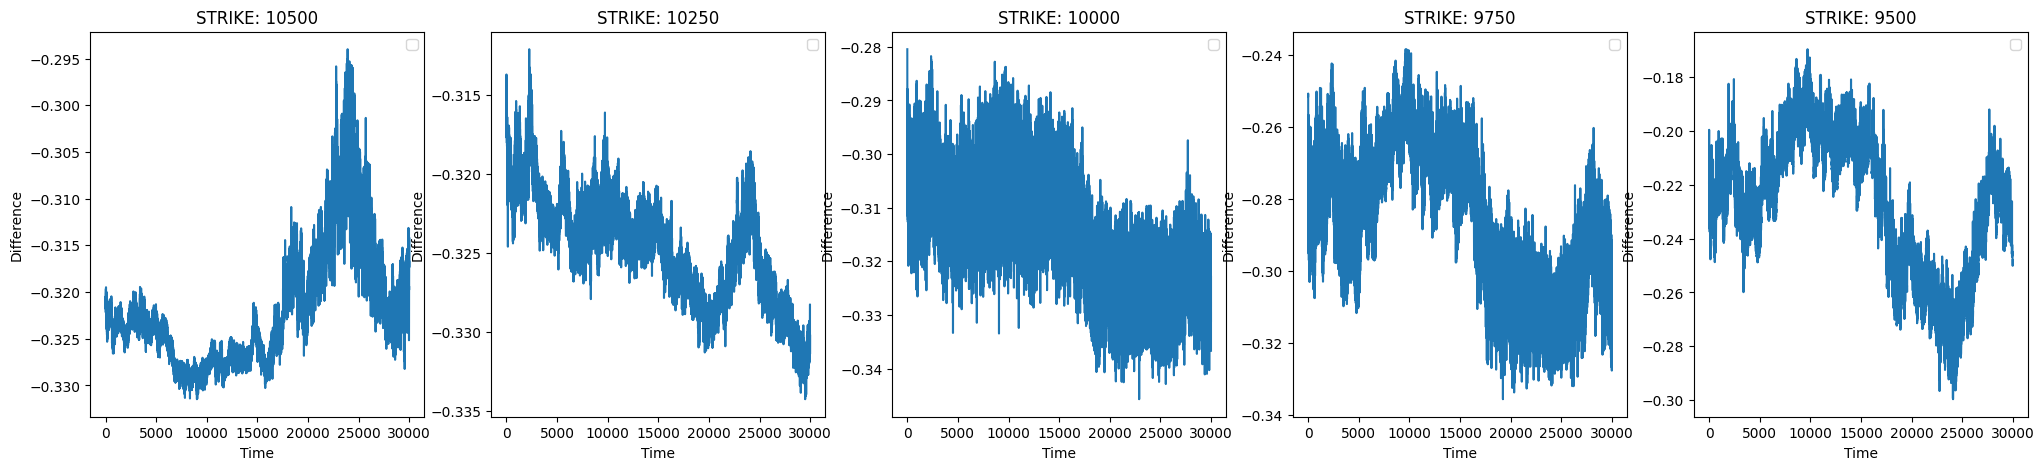

In [ ]:
voucher = vouchers[4]
plt.figure(figsize=(25, 5))
i = 1
for voucher in vouchers:
    voucher_df = vouchers_df[vouchers_df['product'] == voucher]
    strike_price = int(voucher.split('_')[-1])

    # voucher_df['value'] = voucher_df.apply(lambda row: black_scholes_call(row['underlying_price'], row['strike_price'], row['time_to_expiry'], row['RV']), axis=1)

    # IV = pd.Series(fix_data(voucher_df['implied_vol'].values))
    # diff = RV - IV

    # diff = voucher_df['value'] - voucher_df['mid_price']

    IV = pd.Series(fix_data(voucher_df['implied_vol'].values))

    difference = IV - hard_coded_rv

    plt.subplot(1, 5, i)
    i += 1
    plt.plot(difference)
    # plt.plot(RV, label='real_vol')
    plt.legend()
    plt.title(f'STRIKE: {strike_price}')
    plt.xlabel('Time')
    plt.ylabel('Difference')

    plt.plot()



Text(0.5, 1.0, 'VOLCANIC_ROCK_VOUCHER_10000 IV')

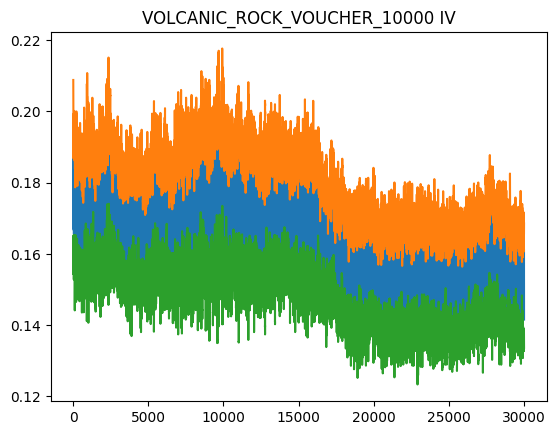

In [655]:
VOLCANIC_ROCK_VOUCHER_10000_df = vouchers_df[vouchers_df['product'] == 'VOLCANIC_ROCK_VOUCHER_10000']
plt.figure()

IV = VOLCANIC_ROCK_VOUCHER_10000_df['implied_vol'].values

window = 10

rolling_mean = pd.Series(IV).rolling(window=window).mean()
std = pd.Series(IV).rolling(window=window).std()

# plot change in mid price over 1 timestep 
mult = 3

plt.plot(IV, label='Rolling Mean')
plt.plot(rolling_mean+std*mult, label='Rolling Std')
plt.plot(rolling_mean-std*mult, label='Rolling Std')
plt.title('VOLCANIC_ROCK_VOUCHER_10000 IV')

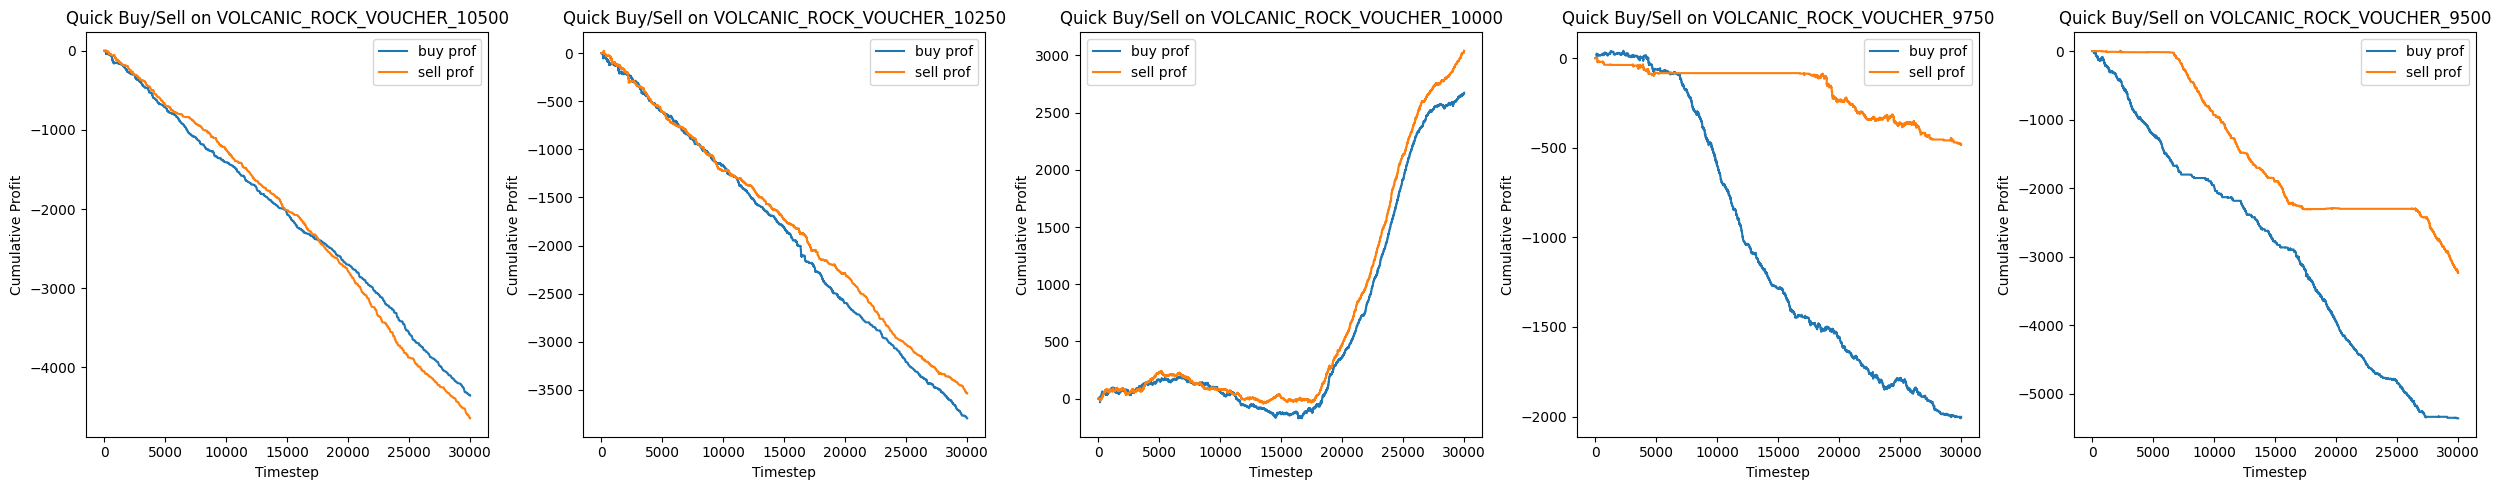

In [686]:
plotnum = 1
plt.figure(figsize=(25, 5))
for voucher in vouchers:

    voucher_df = vouchers_df[vouchers_df['product'] == voucher]
    # IV = pd.Series(fix_data(voucher_df['implied_vol'].values))
    IV = voucher_df['implied_vol'].values
    
    rolling_mean = pd.Series(IV).rolling(window=100).mean()
    std = pd.Series(IV).rolling(window=100).std()
    mult = 1
    # plt.figure()
    # plt.plot(IV, label='IV')
    # plt.plot(rolling_mean, label='Rolling Mean')
    # plt.plot(rolling_mean+std*mult, c='purple')
    # plt.plot(rolling_mean-std*mult, c='purple')
    # plt.xlim(0, 100)

    sell = IV > (rolling_mean + std*mult)
    buy = IV < (rolling_mean - std*mult)

    change_in_price = (voucher_df['mid_price'] - voucher_df['mid_price'].shift(1)).shift(-1).values

    mid_prices = voucher_df['mid_price'].values

    buy_profit = 0
    cum_buy_profit = []
    slippage = 1

    for i, signal in enumerate(buy):
        if signal:
            buy_profit += change_in_price[i] - slippage 
            cum_buy_profit.append(buy_profit)
        else:
            cum_buy_profit.append(buy_profit)
    
    sell_profit = 0
    cum_sell_profit = []
    for i, signal in enumerate(sell):
        if signal:
            sell_profit -= change_in_price[i] + slippage 
            cum_sell_profit.append(sell_profit)
        else:
            cum_sell_profit.append(sell_profit)


    plt.subplot(1, 5, plotnum)
    plotnum += 1
    plt.title(f"Quick Buy/Sell on {voucher}")
    plt.plot(cum_buy_profit, label='buy prof')
    plt.plot(cum_sell_profit, label='sell prof')
    plt.legend()
    plt.ylabel('Cumulative Profit')
    plt.xlabel("Timestep")
    plt.tight_layout()

# crazy cross day

- idea: trade the 2 options contracts that are closesst to the strike price, as these will have the most money to be made!

In [ ]:
def fix_data(data):
    new_data = []
    prev_non_zero = None
    
    for j in range(1, len(data)):
        if data[j] < 2e-10:
            new_data.append(prev_non_zero)
        else:
            prev_non_zero = data[j]
            new_data.append(data[j])

    new_data = np.array(new_data)
    return new_data


plt.figure(figsize=(10, 10))
for voucher in vouchers:

    use_mean = True
    window_len = 1000

    voucher_iv = pd.Series(fix_data(voucher_df[voucher_df['product'] == voucher]['implied_vol'].to_numpy()))
    hard_mean = np.mean(voucher_iv)
    std = np.std(voucher_iv)

    if use_mean:
        voucher_iv = voucher_iv.rolling(window=window_len).mean()

    i += 1
    strike = int(voucher.split('_')[-1])
    underlying = voucher_df[voucher_df['product'] == voucher]['underlying_price'].values
    itm = underlying > strike
    # remove first point from itm
    itm = itm[1:]

    # plot implied vol, with color determiend by in the moneyness
    plt.twinx()
    plt.scatter(range(len(voucher_iv)), voucher_iv, c=itm, cmap='winter', s=1, alpha=0.5)

plt.legend()
plt.show()

# crazy cross day

In [83]:
implied_vol = voucher_df[voucher_df['product'] == 'VOLCANIC_ROCK_VOUCHER_9500']['implied_vol']